In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/ ARKA

/content/drive/MyDrive/ ARKA


#Import Required Libaries

In [3]:
import pandas as pd
import numpy as np
import re
import pickle
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM, Bidirectional, Conv1D, GRU
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer

#PreProcessing the Data

In [4]:
import csv
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/ ARKA/Dataset.csv', error_bad_lines=False)

col = data['tweet']

rows = []
for i in col:
    txt = i.split()
    label = txt[-1]
    txt = txt[:-1]
    tweet = ' '
    tweet = tweet.join(txt)
    #print(tweet)
    #print(label)
    rows.append([tweet,label])

print(rows)

fields = ['tweet', 'label'] 

with open('/content/drive/MyDrive/ ARKA/Updated_Dataset.csv', 'w', encoding='utf-8') as csvfile:  
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(fields)
    csvwriter.writerows(rows)

<ipython-input-4-048ce832b7c7>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/drive/MyDrive/ ARKA/Dataset.csv', error_bad_lines=False)


[['RT @colonelkickhead: Another bloody instant restaurant week?!?! Seriously! They just jumped the shark riding two other sharks powered by shâ€¦', 'none'], ['@azzamalirhabi @JihadiA8 This video of the Peshmerga decimating ISIS is far more interesting. https://t.co/d36g1z12NP', 'none'], ["Oh really? No more instant restaurants? THAT'S SHOCKING. #MKR #MKR2015", 'none'], ["RT @Benfrancisallen: It hasn't been a good few weeks for #ISIS. A new front has opened up in #Sinjar and they're about to lose the battle fâ€¦", 'none'], ['RT @NoToFeminism: I donâ€™t need femisnsn because men carry heavy things that i cannot!!! like shopping boxes and a huge sense of superioriâ€¦', 'none'], ['@MariachiMacabre 19% is not the vast majority', 'none'], ['@DianH4 @ExposeFalsehood And it is Muslims who were the first crusaders attacking the Christian world for centuries before it attacked back', 'racism'], ['@truaemusic @mattybboi83 @Number10gov Capital Hill is a great example of how seldom the world attack

In [5]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
dataset = pd.read_csv("/content/drive/MyDrive/ ARKA/Updated_Dataset.csv")
dataset.dropna(inplace=True)
dataset.head()

,tweet,label
0,RT @colonelkickhead: Another bloody instant re...,none
1,@azzamalirhabi @JihadiA8 This video of the Pes...,none
2,Oh really? No more instant restaurants? THAT'S...,none
3,RT @Benfrancisallen: It hasn't been a good few...,none
4,RT @NoToFeminism: I donâ€™t need femisnsn beca...,none


In [7]:
def preprocess_text(sen):
    sentence = remove_tags(sen)
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

In [8]:
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)

In [9]:
X = []
sentences = list(dataset['tweet'])
for sen in sentences:
    X.append(preprocess_text(sen))
print(X[79])

 Vandaliser sajid fairooz IsraeliRegime And of course the reason the majority now live in Christian lands is Muslim abuse 


In [10]:
y = dataset['label']

encoder = LabelBinarizer()
y = encoder.fit_transform(y)
print(y[61])

[0 1 0]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#**Tokenizer**

In [12]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
print(X_train)

['RT AsheSchow look at how Clinton accusers would be treated under today sexual assault standards gt http co A aMJ ', 'How can they get away with that Kat amp Andre are cunts MKR', 'Offline for the night Need break ll be back tomorrow ', ' NNdabbour These are all excuses to hide the fact that you are following an evil and inhuman religion ', ' NiceeNhess All of you Islamists repeat the same brain dead lines that someone else told you to say ve seen that one thousand times ', ' n verg stevesalaita Palestinians are half Egyptian and half Saudi Palestinians are the spearhead for the Arabs against the Jews ', ' MKR is so intense this round', ' jcmanous looks neat need to start keeping my eyes open for CFPs ', 'Kat amp Andre need to be slapped with sportsmanship or just not be such bad losers it so off putting MKR', 'Let not forget Kern is the person that said he was fully invested in anti harassment Remember the cape comment made ', ' GidgitVonLaRue You re not wrong Can wait for their come

In [13]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
print(X_train)

[[8, 2632, 149, 44, 55, 3015, 70, 21, 1464, 336, 244, 841, 2243, 2154, 339, 13, 12, 104], [55, 28, 18, 52, 445, 24, 9, 31, 51, 68, 15, 2149, 3], [7954, 17, 1, 385, 108, 1208, 150, 21, 125, 967], [892, 103, 15, 32, 1797, 2, 941, 1, 285, 9, 7, 15, 753, 58, 656, 4, 1477, 162], [32, 6, 7, 2098, 1327, 1, 145, 926, 483, 2032, 9, 148, 348, 457, 7, 2, 116, 90, 304, 9, 56, 2261, 351], [1648, 4244, 4245, 896, 15, 484, 2074, 4, 484, 506, 896, 15, 1, 17, 1, 1802, 163, 1, 172], [3, 5, 29, 3467, 20, 205], [3980, 197, 5856, 108, 2, 434, 2510, 36, 624, 606, 17], [31, 51, 68, 108, 2, 21, 24, 2482, 54, 25, 14, 21, 277, 169, 3219, 10, 29, 100, 1025, 3], [177, 14, 1197, 4479, 5, 1, 281, 9, 232, 64, 39, 1884, 8452, 11, 361, 312, 640, 1, 2084, 817, 208], [1370, 7, 72, 14, 224, 28, 321, 17, 57, 6706, 3], [3400, 329, 66, 238, 258, 6, 37, 10, 2217, 67], [570, 256, 659, 199, 49, 42, 22, 2277, 41, 275, 5, 3814], [5706, 303, 4, 7, 15, 15, 443, 2651, 11, 772, 17, 32, 89, 7, 3000, 9738, 25, 282], [508, 1, 1556, 95,

In [14]:
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100

In [15]:
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print(X_train)

[[   8 2632  149 ...    0    0    0]
 [  55   28   18 ...    0    0    0]
 [7954   17    1 ...    0    0    0]
 ...
 [4882   79  150 ...    0    0    0]
 [5001   20    5 ...    0    0    0]
 [ 372 8290  302 ...    0    0    0]]


In [16]:
embeddings_dictionary = dict()
with open('/content/drive/MyDrive/ ARKA/glove.6B.100d.txt', encoding="utf8") as glove_file:
    for line in glove_file:
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions
        
embedding_matrix = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [17]:
from keras.metrics import Precision, Recall
from keras import backend as K

def f1_score(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall
    
    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    f1_score = 2*((precision*recall)/(precision+recall+K.epsilon()))
    return f1_score


In [18]:
model = Sequential([
    Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False),
    Bidirectional(LSTM(50, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)),
    Bidirectional(LSTM(54, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)),
    Bidirectional(LSTM(60, dropout=0.3, recurrent_dropout=0.3)),
    Dense(64, activation="relu"),
    Dense(3, activation="softmax")])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall(), f1_score])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          2433200   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 100)         60400     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 108)         66960     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 120)              81120     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                7744      
                                                        

In [19]:
history = model.fit(X_train, y_train, batch_size=128, epochs=16, verbose=1, validation_split=0.2)

Epoch 1/16
81/81 [==============================] - 235s 3s/step - loss: 0.6760 - accuracy: 0.7240 - precision: 0.7380 - recall: 0.6708 - f1_score: 0.6849 - val_loss: 0.5144 - val_accuracy: 0.7833 - val_precision: 0.7885 - val_recall: 0.7744 - val_f1_score: 0.7849
Epoch 2/16
81/81 [==============================] - 212s 3s/step - loss: 0.5021 - accuracy: 0.7969 - precision: 0.8009 - recall: 0.7903 - f1_score: 0.7957 - val_loss: 0.4930 - val_accuracy: 0.7988 - val_precision: 0.8023 - val_recall: 0.7973 - val_f1_score: 0.7998
Epoch 3/16
81/81 [==============================] - 212s 3s/step - loss: 0.4793 - accuracy: 0.8023 - precision: 0.8073 - recall: 0.7961 - f1_score: 0.8018 - val_loss: 0.4669 - val_accuracy: 0.8047 - val_precision: 0.8089 - val_recall: 0.8023 - val_f1_score: 0.8036
Epoch 4/16
81/81 [==============================] - 211s 3s/step - loss: 0.4585 - accuracy: 0.8149 - precision: 0.8192 - recall: 0.8072 - f1_score: 0.8127 - val_loss: 0.4643 - val_accuracy: 0.8140 - val_pr

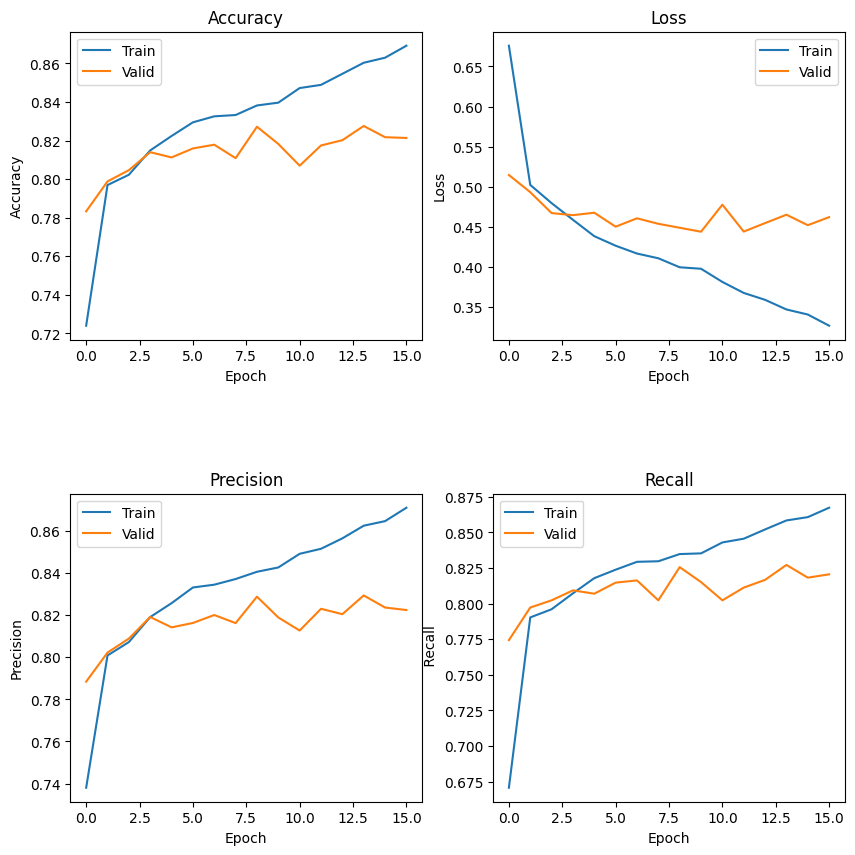

In [21]:
import matplotlib.pyplot as plt

plt.figure(1, figsize = (10,10)) 
    
plt.subplot(221)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['Train', 'Valid']) 
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch') 
plt.legend(['Train', 'Valid']) 

plt.subplot(223)  
plt.plot(history.history['precision'])  
plt.plot(history.history['val_precision'])  
plt.title('Precision')  
plt.ylabel('Precision')  
plt.xlabel('Epoch') 
plt.legend(['Train', 'Valid']) 

plt.subplot(224)  
plt.plot(history.history['recall'])  
plt.plot(history.history['val_recall'])  
plt.title('Recall')  
plt.ylabel(' Recall')  
plt.xlabel('Epoch') 
plt.legend(['Train', 'Valid'])


plt.subplots_adjust(hspace=0.5)

plt.show()

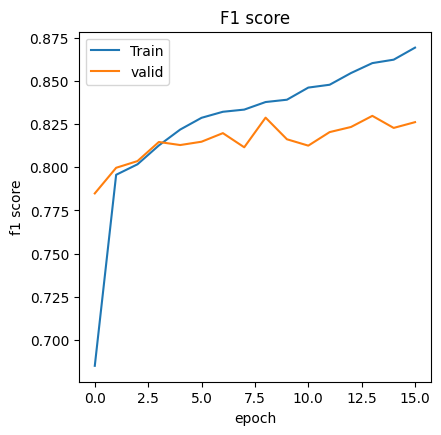

In [24]:
plt.figure(1, figsize = (10,10)) 
plt.subplot(224)  
plt.plot(history.history['f1_score'])  
plt.plot(history.history['val_f1_score'])  
plt.title('F1 score')  
plt.ylabel('f1 score')  
plt.xlabel('epoch') 
plt.legend(['Train', 'valid'])

In [23]:
import pandas as pd

df = pd.DataFrame(history.history)
df['epoch'] = range(1, len(df)+1)
df.set_index('epoch', inplace=True)
print(df)

           loss  accuracy  precision    recall  f1_score  val_loss  \
epoch                                                                
1      0.675960  0.723997   0.738006  0.670778  0.684886  0.514418   
2      0.502066  0.796931   0.800905  0.790327  0.795699  0.492998   
3      0.479289  0.802272   0.807268  0.796057  0.801784  0.466857   
4      0.458454  0.814898   0.819158  0.807225  0.812712  0.464267   
5      0.437986  0.822375   0.825767  0.817908  0.821934  0.467286   
6      0.426060  0.829465   0.833219  0.823832  0.828757  0.449850   
7      0.416295  0.832573   0.834555  0.829368  0.832255  0.460317   
8      0.410368  0.833252   0.837237  0.829756  0.833514  0.453456   
9      0.399136  0.838205   0.840685  0.834806  0.837906  0.448494   
10     0.397277  0.839662   0.842740  0.835292  0.839250  0.443567   
11     0.380815  0.847237   0.849232  0.842964  0.846288  0.477335   
12     0.367061  0.848888   0.851624  0.845586  0.847932  0.443728   
13     0.358463  0.8

In [25]:
model.save("Cyber_Bullying_model.model")
np.save("classes.npy", encoder.classes_)

In [26]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [35]:
loss, accuracy ,precision, recall, f1_score = model.evaluate(X_test,y_test)
print('test accuracy: {}\n test loss: {},\n test precision: {}, \n test recall: {}, \n test f1score: {}'.format(accuracy, loss,precision, recall, f1_score ))

101/101 [==============================] - 20s 199ms/step - loss: 0.4554 - accuracy: 0.8247 - precision: 0.8264 - recall: 0.8222 - f1_score: 0.8248
test accuracy: 0.8247358798980713
 test loss: 0.4554424285888672,
 test precision: 0.8263584971427917, 
 test recall: 0.8222498297691345, 
 test f1score: 0.8248024582862854


#Testing

In [49]:
import pandas as pd
import re
import pickle
import numpy as np
from keras.models import load_model

In [50]:
txt = []
f = open('input.txt','r')
txt.append(f.read())
f.close()

df = pd.DataFrame(txt, columns =['text']) 

In [51]:
df

,text
0,You can't even imagine how i think because i c...


In [52]:
def preprocess_text(sen):
    sentence = remove_tags(sen)
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

In [53]:
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)

In [54]:
X = []
sentences = list(df['text'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [55]:
f = open('tokenIzer.pickle','rb')
tokenizer = pickle.load(f)
f.close()

In [56]:
X = tokenizer.texts_to_sequences(X)

In [57]:
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_test = pad_sequences(X, padding='post', maxlen=maxlen)
model = load_model('Cyber_Bullying_Model.model')
pred = model.predict(X_test)
classes = np.load('classes.npy')
classes[np.argmax(pred)]

1/1 [==============================] - 2s 2s/step


'racism'